# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Image dimensions: (32, 32, 3)
Number of classes: 100


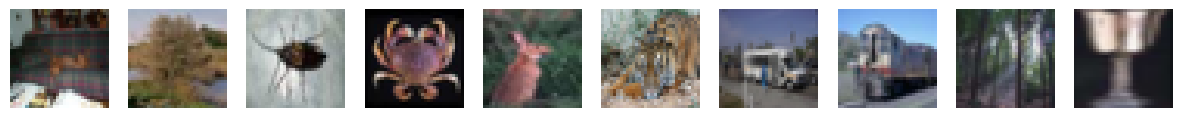

In [3]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

print(f'X_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

# 2. Examine the dimensions of the images
print("Image dimensions:", x_train.shape[1:])

# 3. Determine the number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

# 4. Show few examples of training set
num_images = 10
random_indexes = np.random.randint(0, len(x_train), size=num_images)

plt.figure(figsize=(15, 5))
for i, index in enumerate(random_indexes):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_train[index])
    plt.axis('off')

plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your code here
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 1. Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. One-Hot Encode the labels
num_classes = 100
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Perform the split
x_train, x_val, y_train_one_hot, y_val_one_hot = train_test_split(
    x_train, y_train_one_hot, test_size=0.2, random_state=42
)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Your code here

model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


# Flatten the output
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical_crossentropy
- <b>Optimizer:</b> SGD

In [6]:
#from keras.optimizers import SGD

# Your code here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [7]:
# Your code here
history = model.fit(
    x_train,                # Training data
    y_train_one_hot,        # Training labels (one-hot encoded)
    epochs=75,              # Number of epochs to train
    batch_size=32,          # Batch size
    validation_data=(x_val, y_val_one_hot),  # Validation data
)

Epoch 1/75
1250/1250 [==============================] - 34s 26ms/step - loss: 3.9967 - accuracy: 0.0934 - val_loss: 3.4756 - val_accuracy: 0.1764
Epoch 2/75
1250/1250 [==============================] - 33s 26ms/step - loss: 3.4128 - accuracy: 0.1845 - val_loss: 3.0902 - val_accuracy: 0.2462
Epoch 3/75
1250/1250 [==============================] - 31s 25ms/step - loss: 3.1244 - accuracy: 0.2349 - val_loss: 2.8897 - val_accuracy: 0.2862
Epoch 4/75
1250/1250 [==============================] - 33s 26ms/step - loss: 2.9537 - accuracy: 0.2659 - val_loss: 2.7656 - val_accuracy: 0.3107
Epoch 5/75
1250/1250 [==============================] - 33s 26ms/step - loss: 2.8335 - accuracy: 0.2911 - val_loss: 2.6842 - val_accuracy: 0.3260
Epoch 6/75
1250/1250 [==============================] - 33s 26ms/step - loss: 2.7269 - accuracy: 0.3093 - val_loss: 2.6417 - val_accuracy: 0.3396
Epoch 7/75
1250/1250 [==============================] - 32s 25ms/step - loss: 2.6397 - accuracy: 0.3274 - val_loss: 2.6022 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 68%
- <b>Other metric:</b> F1 score
- <b>Reason for selection:</b> gives an idea about how well the model is fitting the test data. High score means model fits well
- <b>Value of metric:</b> 0.3135
- <b>Interpretation of metric value:</b> Low score denotes model performs well on training data but not on test data

In [8]:
# Your code here
from sklearn.metrics import f1_score

# Predict on validation data
y_val_pred = model.predict(x_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val_one_hot, axis=1)

# Calculate F1 score
f1 = f1_score(y_val_true_classes, y_val_pred_classes, average='weighted')
print(f"F1 Score: {f1:.4f}")


313/313 [==============================] - 3s 10ms/step
F1 Score: 0.3135


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

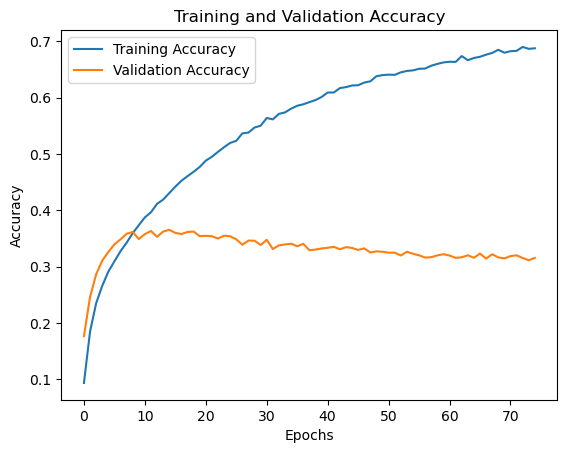

In [9]:
# Your code here
import matplotlib.pyplot as plt

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

Answer: I have used the following techniques to improve model performance

- Used data augmentation to generate more diverse training data.
- Added L2 regularization to the convolutional layers and fully connected layers to prevent overfitting.
- Added batch normalization layers after each convolutional layer to stabilize learning and improve performance.
- Adjusted the learning rate dynamically during training to improve convergence.

In [9]:
# Your code here

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train_one_hot, batch_size=32),
                    epochs=75,
                    validation_data=(x_val, y_val_one_hot),
                    callbacks=[lr_scheduler],
                    verbose=1)


Epoch 1/75
1250/1250 [==============================] - 72s 56ms/step - loss: 3.9702 - accuracy: 0.1525 - val_loss: 4.3706 - val_accuracy: 0.1306 - lr: 0.0010
Epoch 2/75
1250/1250 [==============================] - 70s 56ms/step - loss: 3.1349 - accuracy: 0.2609 - val_loss: 2.9700 - val_accuracy: 0.3047 - lr: 0.0010
Epoch 3/75
1250/1250 [==============================] - 69s 55ms/step - loss: 2.8693 - accuracy: 0.3109 - val_loss: 2.8016 - val_accuracy: 0.3288 - lr: 0.0010
Epoch 4/75
1250/1250 [==============================] - 71s 57ms/step - loss: 2.7127 - accuracy: 0.3416 - val_loss: 2.8976 - val_accuracy: 0.3205 - lr: 0.0010
Epoch 5/75
1250/1250 [==============================] - 70s 56ms/step - loss: 2.6234 - accuracy: 0.3582 - val_loss: 2.6842 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 6/75
1250/1250 [==============================] - 69s 55ms/step - loss: 2.5426 - accuracy: 0.3765 - val_loss: 2.7179 - val_accuracy: 0.3517 - lr: 0.0010
Epoch 7/75
1250/1250 [========================

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

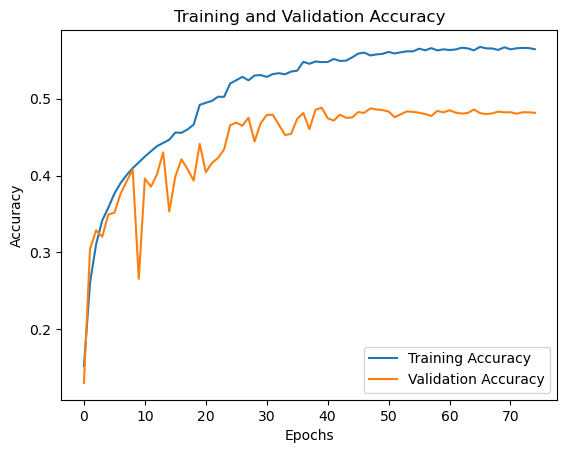

In [10]:
import matplotlib.pyplot as plt

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 3s 10ms/step


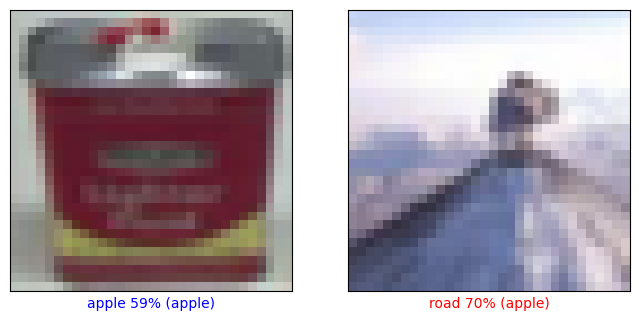

True label: apple
Predicted label: road


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# CIFAR-100 labels
cifar100_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]
# Make predictions on the test set
predictions = model.predict(x_test)

# Get the true labels and predicted labels
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Find correctly and incorrectly classified images
correct_indices = np.where(y_true == y_pred)[0]
incorrect_indices = np.where(y_true != y_pred)[0]

# Select one correct and one incorrect classification
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Function to plot an image and its probabilities
def plot_image(idx, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(cifar100_labels[predicted_label],
                                         100*np.max(predictions_array),
                                         cifar100_labels[true_label]),
                                         color=color)

# Plot the correct classification
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_image(correct_idx, predictions[correct_idx], y_true[correct_idx], x_test[correct_idx])

# Plot the incorrect classification
plt.subplot(1, 2, 2)
plot_image(incorrect_idx, predictions[incorrect_idx], y_true[incorrect_idx], x_test[incorrect_idx])

plt.show()

# Print the model's classification probabilities for each
print(f"True label: {cifar100_labels[y_true[incorrect_idx]]}")
print(f"Predicted label: {cifar100_labels[y_pred[incorrect_idx]]}")

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The model initially had an accuracy of 68% but validation accuracy was only about 30%. Though the model appeared to be performing well. It was overfitting, it was performing well on the training data while not much on the training data. The low F1 score of 0.31 and the plot should it clearly as the validation accuracy started diverging after a certain point from training accuracy. 

Upon improving the model, though the accuracy seemed to be only 56%, the validation accuracy has improved a lot to nearly 50%. The F1 score has also improved. The plot shows the training and testing accuracy is following similar graph and increases linearly. 

There are other techniques which can be used to improve the model further like trying different optimizers, loss function, changing th hyper parameters, reducing the amount of training and so on.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.